In [1]:
import pandas as pd
import cv2, math,json,geopy.distance, os, random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fftpack
from sklearn import metrics

In [2]:
class dataproc:
  def __init__(self,path):
    self.path = path
    self.n = 5

  def read_csv_format(self):
    df = pd.read_csv(self.path)
    
    return df
  
  def pick_random(self):
    df = self.read_csv_format()
    unique_QTL = df['Position'].unique()
    select_QTLs = random.sample(unique_QTL.tolist(),self.n)
    df_filter = df[df['Position'].isin(select_QTLs)]
    return df_filter


  def visualize(self, df):
   fig, ax = plt.subplots(figsize=(10, 6))
   sns.lineplot(data=df, x='Generation', y='Frequency', hue='Position', ax=ax, legend=False)
        
   plt.show()

In [3]:
path ="/home/etb68/YeastProj.dir/evogen-sims/ET_Yeast/output.dir/Selection_Models/CSCP.dir/genome1_100_0.5.csv"
dp = dataproc(path)

In [4]:
df = dp.pick_random()

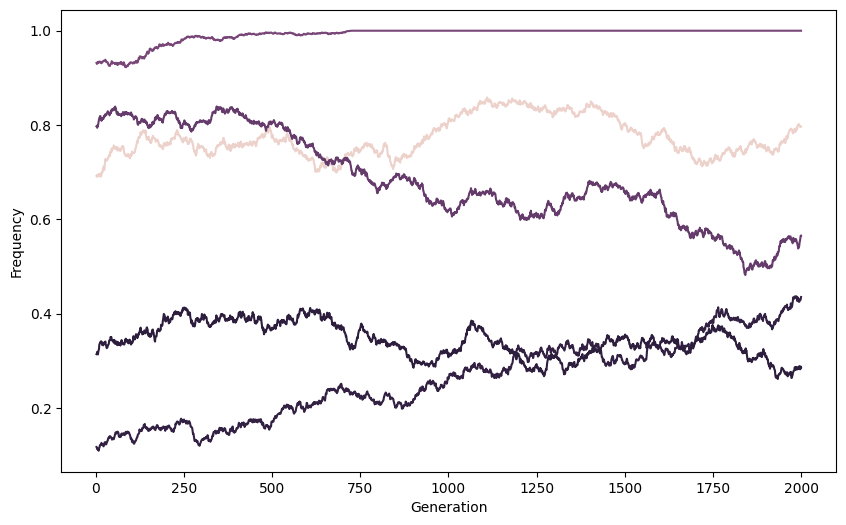

In [5]:
dp.visualize(df)

In [ ]:
time_step = 1
sign = df['Frequency'].values.tolist()

In [ ]:
def fft_filter(self, df, time_step, plot):
        fig, ax = plt.subplots(figsize=(10, 6))
        
        for position in df['Position'].unique():
            position_data = df[df['Position'] == position]
            sign = position_data['Frequency'].values.tolist()

            fft_sig = fftpack.fft(sign)
            power = np.abs(fft_sig)
            sample_freq = fftpack.fftfreq(len(sign), d=time_step)

            pos_mask = np.where(sample_freq > 0.01)
            freqs = sample_freq[pos_mask]
            peak_indx = power[pos_mask].argmax()
            peak_freq = freqs[power[pos_mask].argmax()]

            copy_freq_fft = fft_sig.copy()
            copy_freq_fft[np.abs(sample_freq) > 0.05] = 0
            lf_signal = fftpack.ifft(copy_freq_fft)

            if plot:
                ax.plot(sample_freq[pos_mask], power[pos_mask], label=f'Position: {position}')

        ax.set_xlabel('Frequency')
        ax.set_ylabel('Power')
        ax.legend().remove()
        plt.show()

In [ ]:
lf_signal = fft_filter(sign,1, 1)
plt.plot(sign)
plt.plot(lf_signal,'r')

In [ ]:
plt.plot((sign - lf_signal),'m')

In [ ]:
def get_low_freq(fft_sig, peak_freq, sample_freq, freqs, peak_indx):
  max_freq = max(freqs)
  lf_signals = []
  low_freqs = [0, peak_freq/4, peak_freq/2, peak_freq, peak_freq*2, peak_freq*4]
  print ('low frequency components\n')
  for cur_freq, next_freq in zip(low_freqs[0:-1],low_freqs[1:]):
    start_freq = cur_freq; end_freq = next_freq
    copy_freq_fft = fft_sig.copy()
    print ('frequency range is: ' +str(start_freq) +'-'+ str(end_freq))
    copy_freq_fft[np.abs(sample_freq) <start_freq] = 0
    copy_freq_fft[np.abs(sample_freq) >end_freq] = 0
    lf_signal = fftpack.ifft(copy_freq_fft)
    lf_signals.append(lf_signal)
  print ('\n')
  return lf_signals

def get_high_freq(fft_sig,peak_freq, sample_freq, freqs,peak_indx):

  max_freq = max(freqs)
  lf_signals = []
  low_freqs = [peak_freq*20,peak_freq*40,peak_freq*80,peak_freq*160,max_freq]

  print ('high frequency components\n')
  for cur_freq,next_freq in zip(low_freqs[0:-1],low_freqs[1:]):
    start_freq = cur_freq; end_freq = next_freq
    copy_freq_fft = fft_sig.copy()
    print ('frequency range is: ' +str(start_freq) +'-'+ str(end_freq))
    copy_freq_fft[np.abs(sample_freq) < start_freq] = 0
    copy_freq_fft[np.abs(sample_freq) > end_freq] = 0
    lf_signal = fftpack.ifft(copy_freq_fft)
    lf_signals.append(lf_signal)
    
  print ('\n')
    
  return lf_signals

def multiscale_fft(sign,time_step):
    fft_sig = fftpack.fft(sign)
    power = np.abs(fft_sig)
    ## get corresponding frequecies
    sample_freq = fftpack.fftfreq((np.array(sign)).size, d=time_step)
    pos_mask = np.where(sample_freq > 0)
    # pos_mask = np.where((sample_freq > 0)&(sample_freq < 0.05))
    freqs = sample_freq[pos_mask]
    # print (max(freqs),power[pos_mask].argmax())
    peak_indx = power[pos_mask].argmax()
    peak_freq = freqs[power[pos_mask].argmax()]

    low_filtered_sigs = get_low_freq(fft_sig,peak_freq, sample_freq, freqs,peak_indx)
    high_filtered_sigs = get_high_freq(fft_sig,peak_freq, sample_freq, freqs,peak_indx)
    return sample_freq, pos_mask, power, low_filtered_sigs,high_filtered_sigs

In [ ]:
sample_freq, pos_mask, power, low_filtered_sigs,high_filtered_sigs = multiscale_fft(sign,1)

In [ ]:
for filt in low_filtered_sigs:
  plt.plot(sign)
  plt.plot(filt)
  plt.show()